# Using Numpy to make and process arrays.

Numpy is the highly-optimized, super-fast workhorse that underlies much of the scientific computing stack
see Harris et al. 2020 in Nature for evidence.

In [1]:
import numpy as np

We're also going to want to look at matrices, so let's import matplotlib too.
this import statement is more complex, but of key importance, it creates a plt object we'll use later

In [2]:
import matplotlib.pyplot as plt

Create a 1 dimensional array 15 elements long. np.arange is a FAST version of python range()

In [4]:
a = np.arange(15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

The best part of Jupyter notebooks is, in my opinion, embedding pictures into the code. Above, we imported plt, which we will use to plot different python objects.

The plt.plot(a) command says to plot that list of 15 integers.

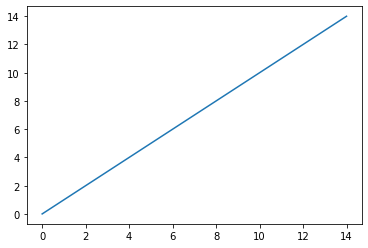

In [5]:
plt.plot(a)
plt.show() # You could exclude this, but I'm including it to be explicit and clear.

Numpy 2-dimensional arrays can be made from just reshaping the above list using the reshape our command.

Go ahead and reshape our array into a 2 dimensional array of size 3 by 5.

NOTE, numpy, and about 60% of computer programming, denotes things in terms of Row then Column (RC order) but some things, especially those that regard displaying pixels, denote things as x, y (which note is CR order)

In [7]:
a = np.arange(15).reshape(3, 5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

As above, use the plt.plot() command to show the matrix. Notice that because we are asking it to PLOT (which assumes a line graph), it will output that.

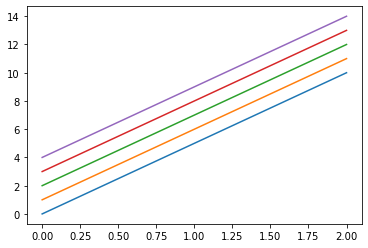

In [8]:
plt.plot(a)
plt.show()

The above show probably is not what you expected. It has interpreted it as five different lines, but we probably meant to
think of it as a matrix. If instead we want it to be shown as a matrix, we'll use the command plt.imshow()

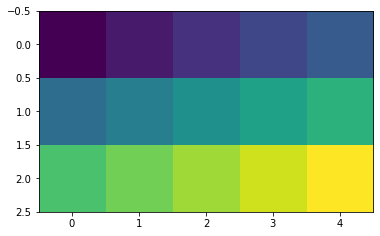

In [9]:
plt.imshow(a)
plt.show()

a is an OBJECT, which has lots of useful attributes, such as:

In [10]:
a.shape # (3, 5)
a.ndim # 2
a.dtype.name # 'int64'
a.size # 15
a.itemsize #8 Pro-level question. Why is it 8? Hint 8 * 8 = 64.
type(a) # <class 'numpy.ndarray'>

numpy.ndarray

# Creating an array from values

In [11]:
a = np.array([1,2,3,4])  # RIGHT
# a = np.array(1,2,3,4)    # WRONG: TypeError: array() takes from 1 to 2 positional arguments but 4 were given. Uncomment this to see what happens with error handling.

2d version

In [12]:
b = np.array([(1.52,2,3), (4,5,6)])
print(b)

[[1.52 2.   3.  ]
 [4.   5.   6.  ]]


Creating an empty array of zeros # NOTICE the extra paranetheses.

In [13]:
np.zeros((3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

or ones.

In [14]:
np.ones((2, 3), dtype=np.int16)                # dtype can also be specified

array([[1, 1, 1],
       [1, 1, 1]], dtype=int16)

or random.

In [15]:
r = np.random.random((2, 3))           

Or even faster, just "allocate the memory" with an empty matrix.

In [16]:
c = np.empty((2,3))

What do you think this will produce? The empty matrix just points to memory, which means that if you look there, you will just see whatever was there from before, which will likely look crazy.

In [17]:
print('c:\n', c)
# array([[  3.73603959e-262,   6.02658058e-154,   6.55490914e-260],  # may vary
#        [  5.30498948e-313,   3.14673309e-307,   1.00000000e+000]])

c:
 [[1.52 2.   3.  ]
 [4.   5.   6.  ]]


Array math

In [18]:
a = np.array([20, 30, 40, 50.])
b = np.arange(4)

c = a-b

print('a', a)
print('b', b)
print('c', c)

a [20. 30. 40. 50.]
b [0 1 2 3]
c [20. 29. 38. 47.]


** is the exponent operator in python

In [19]:
d = b**2
print('d', d)

d [0 1 4 9]


Numpy also has handy array-enabled math operators

In [20]:
e = 10*np.sin(a)
print('e', e)

e [ 9.12945251 -9.88031624  7.4511316  -2.62374854]


Can also create conditional arrays

In [21]:
f = a<35
print('f', f)

f [ True  True False False]


# SLICING

In [22]:
a = np.arange(10)
b = np.arange(12).reshape(3, 4)

Can access items directly, but need as many indices as there are dimensions

In [23]:
print(a[2])
print(b[2, 3])

2
11


Can also access "slices", which are denoted Start, Stop, Stepsize

In [ ]:
r = a[1: 9: 2]

An empty slice argument means use the default

In [25]:
r = a[::2]
r

array([0, 2, 4, 6, 8])

A single colon means use the full thing.

In [ ]:
r = a[:]

Using slices, you can also set individual elements in the array:

In [ ]:
r[0] = 33
r[1:3] = 44
print('r', r)

Setting in this way also can be done according to a condition:

In [26]:
r[r <= 6] = 5
print('r', r)

r [5 5 5 5 8]


Finally, an alternate and possibly more powerful way of setting conditional values is the np.where function
This function sets anywhere greater than 10 to be 12, otherwise it keeps it at whatever value was already in r

In [27]:
r = np.where(r > 10, 12, r)
print('r', r)

r [5 5 5 5 8]


Looping over arrays

In [ ]:
for i in a:
    r = i**(1/3.)
    # print('r', r)

Loop to get the sum of the array

In [ ]:
r = 0
for row in b:
    # print('row', row)
    for value in row:
        # print('value', value)
        r += value
print('slow sum', r)

NOTE: Iterating over arrays here is just for illustration as it is VERY VERY SLOW
and loses the magic of numpy speed. We'll learn how to bet around this later
by "vectorizing" functions, which basically means batch calculating
everything in a vector all in one call. For now, here's an example of the
much faster version

In [ ]:
r = b.sum()
print('fast sum', r)

Vectorized multiplication (and broadcasting):

In [ ]:
a = np.arange(20).reshape(5, 4)
b = np.arange(20).reshape(5, 4)

c = a * b # NOTE: this does element-wise multiplication, not the matrix multiplication you learned in 7-th? grade.

print('c\n', c)

Numpy will smartly "broadcast" two matrices of different sizes or dimensions so that it works:

In [ ]:
d = np.arange(4)
e = a * d # WAIT! Aren't you multiplying two different matrices with different sizes? Yes!
print('e\n', e)

Also means you can use the same notation to multiply an array (2dim) against a scalar (0dim):

In [ ]:
f = a * 6.0
print('f\n', f)

Plotting with matplotlib.

NOTE: If you have done a plt.plot() above but not called plt.show(), this next line will add the graphics on top of the
previously drawn graphics. Whey you call plt.show(), it shows it, then clears it.

In [ ]:
ax = plt.imshow(b)
# plt.show()

Perhaps you want a colorbar?

In [ ]:
ax = plt.imshow(b)
plt.colorbar(ax)
plt.show()

You can also define functions in Jupyter.

In [ ]:
def mandelbrot(h, w, maxit=20 ):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2            # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much

    return divtime


plt.imshow(mandelbrot(400, 400))
# plt.show()

# CLASS ACTIVITY:

Create a 20 by 40 matrix of random values 0-1, then set the upper left quadrant to 1. Next, set the last COLUMN to 2.

Finally, change all values less than .5 to be 3.

You will likely want to use the matrix slicing notation discussed above to set values.




In [31]:
a = np.random.random((20, 40))
a[0:10, 0:20] = 1
b = np.where(a < .5, 3, a)
print(b)

[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         3.         0.69836953 0.78825773 3.
  0.52550141 3.         3.         3.         3.         0.58848582
  0.71082914 3.         0.96925607 0.83185762 0.8764382  0.77438374
  3.         0.76310652 0.91449134 3.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         0.63212517 3.         3.         0.59113998
  0.9592515  0.74835792 0.96578153 3.         0.7681029  0.91125134
  0.78225434 3.         3.         3.         0.74970858 3.
  3.         0.5210444  3.         0.54224123]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.        